In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


# Intro

The following data set includes of 15 women their height and weight. All parciptants where in the age range 30-39.

We will predict the height based on their weight, this will be done with an linear regression.

In [ ]:
file='data.csv'
df=pd.read_csv(file)
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


# Data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [ ]:
df.shape

(15, 2)

In [ ]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

We have no null values and all data types make, so we can move on with the Exploratory Analysis.

# Exploratory Analysis

In [ ]:
df.Height.value_counts()

1.47    1
1.50    1
1.52    1
1.55    1
1.57    1
1.60    1
1.63    1
1.65    1
1.68    1
1.70    1
1.73    1
1.75    1
1.78    1
1.80    1
1.83    1
Name: Height, dtype: int64

In [ ]:
df.Weight.value_counts()

52.21    1
53.12    1
54.48    1
55.84    1
57.20    1
58.57    1
59.93    1
61.29    1
63.11    1
64.47    1
66.28    1
68.10    1
69.92    1
72.19    1
74.46    1
Name: Weight, dtype: int64

As we can see all values appear once so there is no need for a visualization.

So we can move one and start the analysis.

# Linear regression
## Assumptions
### Linearity

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


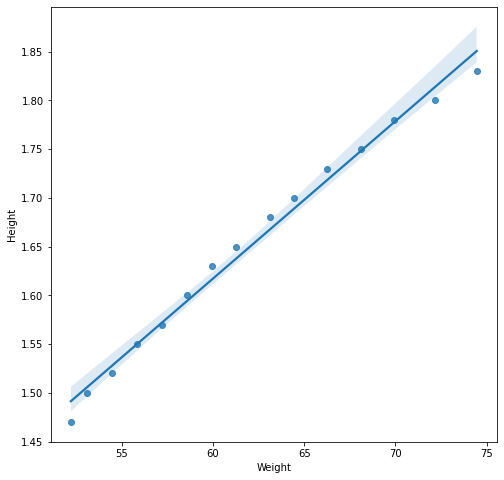

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(df.Weight, df.Height)

As we can see we do linearity between the dependent and independet variable. 

Next we want to check the "Mean of Residuals".

## Checking for Homoscedasticity

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


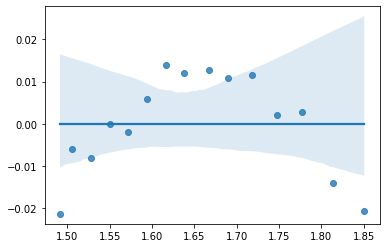

In [ ]:
model=sm.OLS.from_formula('Height ~ Weight', data=df)
result=model.fit()
sns.regplot(result.fittedvalues, result.resid)

In [ ]:
sm.stats.diagnostic.het_goldfeldquandt(result.resid, result.model.exog, drop=0.2)

(0.6528023737636236, 0.6848174673812438, 'increasing')

The p-value is not smaller than 0.05, therefore we have homoscedasticity.

## Checking for normality of residuals

((array([-1.69372899, -1.22918025, -0.93620006, -0.70737068, -0.51078428,
         -0.33229293, -0.1638693 ,  0.        ,  0.1638693 ,  0.33229293,
          0.51078428,  0.70737068,  0.93620006,  1.22918025,  1.69372899]),
  array([-2.13546561e-02, -2.05654623e-02, -1.39178879e-02, -8.00223047e-03,
         -6.04597445e-03, -1.91474251e-03,  4.15135119e-05,  2.11232323e-03,
          2.72968650e-03,  5.96755842e-03,  1.07161536e-02,  1.14949600e-02,
          1.20550464e-02,  1.26724096e-02,  1.40113024e-02])),
 (0.0122253613654257, -1.2131199534476508e-15, 0.9654775130541724))

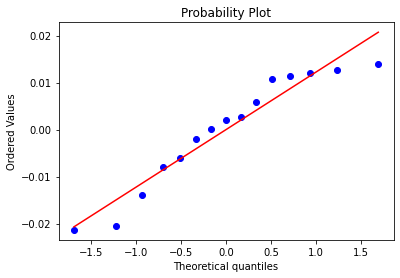

In [ ]:
stats.probplot(result.resid, dist='norm', plot=plt)

In [ ]:
from scipy.stats import kstest
kstest(result.resid, 'norm', stats.norm.fit(result.resid))

KstestResult(statistic=0.15823829106356901, pvalue=0.7924907400986418)

The outcome of the test has Kolmogrov-Smirnov test shows that we have normal distribution, because our p-value is bigger than 0.05 

Next we can check for 

## Linear Mixed Effects Model

In [ ]:
model=sm.OLS.from_formula('Height ~ Weight', data=df)
result=model.fit()
result.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1190.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           3.60e-14
Time:                        17:01:18   Log-Likelihood:                 45.735
No. Observations:                  15   AIC:                            -87.47
Df Residuals:                      13   BIC:                            -86.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6485      0.029     22.191      0.000       0.585       0.712
Weight         0.0161      0.000     34.502      0.000       0.015       0.017
==============================================================================
Omnibus:                        1.577   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.241
Skew:                          -0.545   Prob(JB):                        0.538
Kurtosis:                       2.107   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Setting up the the function

In [ ]:
def height_func(weight):
  y=round(0.6485+0.0161*weight+0,2)
  return(y)

In [ ]:
height_func(58.57)

1.59

In [ ]:
height_func(75)

1.86

For comparance I show case that table with the hights and weights

In [ ]:
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


Our model allows us, based on the weight, to predict the height of women in their thirties (based on the data set) with 98.8% accuracy. 